<a href="https://colab.research.google.com/github/estevaovukelic/Regressions/blob/main/New_York_City_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Taxi Fare Prediction

Kaggle: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview.

Description:

In this playground competition, hosted in partnership with Google Cloud and Coursera, you are tasked with predicting the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While you can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used (see the starter code for an example of this approach in Kernels). Your challenge is to do better than this using Machine Learning techniques!

File descriptions
train.csv - Input features and target fare_amount values for the training set (about 55M rows).
test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.
sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.

## Packages

In [2]:
!apt-get install libgeos-3.6.2
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     - 133.1 MB 427 kB/s
     |████████████████████████████████| 6.6 MB 30.9 MB/s 
     |████████████████████████████████| 219 kB 54.4 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-li

In [3]:
import pandas as pd
import numpy as np
import random
import zipfile
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load files

In [5]:
dataset_path = '/content/drive/MyDrive/taxi/new-york-city-taxi-fare-prediction.zip'
zip_object = zipfile.ZipFile(file = dataset_path, mode = "r")
zip_object.extractall('./')
zip_object.close()

In [6]:
!head train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [7]:
number_rows = sum(1 for line in open('train.csv'))
number_rows

55423857

In [8]:
sample_500 = 500000

In [9]:
range(1, number_rows + 1)

range(1, 55423858)

In [10]:
number_rows - sample_500

54923857

In [11]:
random.seed(22)
chosen_lines = sorted(random.sample(range(1, number_rows + 1),
                                 number_rows - sample_500))

In [12]:
number_rows - len(chosen_lines)

500000

In [13]:
train = pd.read_csv('train.csv', skiprows = chosen_lines)

In [14]:
train.shape

(500000, 8)

In [15]:
train.to_csv('train_sample_' + str(sample_500) + '.csv', index = False)

In [16]:
train = pd.read_csv('train_sample_' + str(sample_500) + '.csv',
                    parse_dates = ['key', 'pickup_datetime'],
                    dtype = {'fare_amount': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude': np.float32,
                             'dropoff_longitude': np.float32,
                             'passenger_count': np.int32             
                    })

In [17]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-11-07 10:47:40.000000300,7.30,2011-11-07 10:47:40+00:00,-74.003922,40.753017,-73.992371,40.735363,1
1,2012-12-21 06:47:00.000000930,11.50,2012-12-21 06:47:00+00:00,-73.947472,40.771229,-73.981834,40.760273,1
2,2010-05-24 14:24:00.000000210,49.57,2010-05-24 14:24:00+00:00,-73.982483,40.756741,-73.789986,40.646912,1
3,2014-05-01 14:20:00.000000142,22.00,2014-05-01 14:20:00+00:00,-74.016846,40.704765,-73.975609,40.748966,1
4,2011-02-04 18:43:06.000000200,14.10,2011-02-04 18:43:06+00:00,-74.003609,40.720436,-73.985764,40.759838,1


In [18]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float32
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float32
pickup_latitude                  float32
dropoff_longitude                float32
dropoff_latitude                 float32
passenger_count                    int32
dtype: object

## Database cleanup

In [19]:
train.isna().sum(axis = 0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

In [20]:
print('Original number of rows: %d' % len(train))
train = train.dropna(how='any', axis='rows')
print('Numbers of rows after dropping missing values: %d' % len(train))

Original number of rows: 500000
Numbers of rows after dropping missing values: 499996


### Checking the dates

#### `key`

In [21]:
key = train['key']

In [22]:
key.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                            499996
unique                           499974
top       2011-02-26 11:52:00.000000200
freq                                  2
first     2009-01-01 00:06:48.000000200
last      2015-06-30 23:59:48.000000300
Name: key, dtype: object

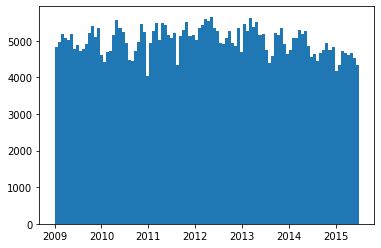

In [23]:
plt.hist(key, bins = 100);

#### `pickup_datetime`

In [24]:
pdt = train['pickup_datetime']
pdt.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                        499996
unique                       479176
top       2011-04-10 01:28:00+00:00
freq                              5
first     2009-01-01 00:06:48+00:00
last      2015-06-30 23:59:48+00:00
Name: pickup_datetime, dtype: object

In [25]:
pdt = pdt.map(lambda date: date.tz_localize(None))

In [26]:
pdt.head()

0   2011-11-07 10:47:40
1   2012-12-21 06:47:00
2   2010-05-24 14:24:00
3   2014-05-01 14:20:00
4   2011-02-04 18:43:06
Name: pickup_datetime, dtype: datetime64[ns]

In [27]:
key = pd.to_datetime(key.dt.strftime('%Y-%m-%d %H:%M:%S'))

In [28]:
key.head()

0   2011-11-07 10:47:40
1   2012-12-21 06:47:00
2   2010-05-24 14:24:00
3   2014-05-01 14:20:00
4   2011-02-04 18:43:06
Name: key, dtype: datetime64[ns]

In [29]:
(key == pdt).value_counts()

True    499996
dtype: int64

In [30]:
train.drop(['key'], axis = 1, inplace = True)

In [31]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.30,2011-11-07 10:47:40+00:00,-74.003922,40.753017,-73.992371,40.735363,1
1,11.50,2012-12-21 06:47:00+00:00,-73.947472,40.771229,-73.981834,40.760273,1
2,49.57,2010-05-24 14:24:00+00:00,-73.982483,40.756741,-73.789986,40.646912,1
3,22.00,2014-05-01 14:20:00+00:00,-74.016846,40.704765,-73.975609,40.748966,1
4,14.10,2011-02-04 18:43:06+00:00,-74.003609,40.720436,-73.985764,40.759838,1


In [32]:
train['pickup_datetime'] = pdt

In [33]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.30,2011-11-07 10:47:40,-74.003922,40.753017,-73.992371,40.735363,1
1,11.50,2012-12-21 06:47:00,-73.947472,40.771229,-73.981834,40.760273,1
2,49.57,2010-05-24 14:24:00,-73.982483,40.756741,-73.789986,40.646912,1
3,22.00,2014-05-01 14:20:00,-74.016846,40.704765,-73.975609,40.748966,1
4,14.10,2011-02-04 18:43:06,-74.003609,40.720436,-73.985764,40.759838,1


### Coordinates

#### `pickup_longitude`

In [34]:
pic_lon = train['pickup_longitude']
pic_lon.describe()

count    499996.000000
mean        -72.477806
std          12.268653
min       -3325.981689
25%         -73.992073
50%         -73.981819
75%         -73.967056
max          57.453457
Name: pickup_longitude, dtype: float64

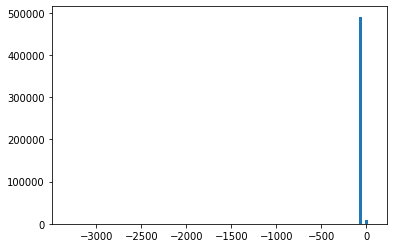

In [35]:
plt.hist(pic_lon, bins = 100);

In [36]:
pic_lon.median()

-73.98181915283203

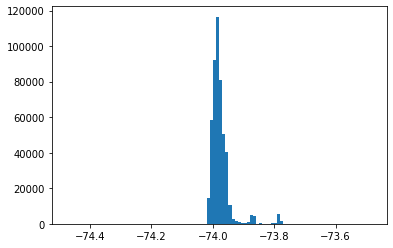

In [37]:
plt.hist(pic_lon[(pic_lon > pic_lon.median() - 0.5) & (pic_lon < pic_lon.median() + 0.5)], bins = 100);

In [38]:
pic_lon_val = (pic_lon > pic_lon.median() - 0.5) & (pic_lon < pic_lon.median() + 0.5)

In [39]:
pic_lon_val.value_counts()

True     490127
False      9869
Name: pickup_longitude, dtype: int64

In [40]:
print(pic_lon_val.value_counts(), '\n', pic_lon_val.value_counts(normalize = True))

True     490127
False      9869
Name: pickup_longitude, dtype: int64 
 True     0.980262
False    0.019738
Name: pickup_longitude, dtype: float64


#### `pickup_latitude`

In [41]:
pic_lat = train['pickup_latitude']
pic_lat.describe()

count    499996.000000
mean         39.931660
std           9.617307
min       -2503.788818
25%          40.734898
50%          40.752659
75%          40.767120
max        2943.202637
Name: pickup_latitude, dtype: float64

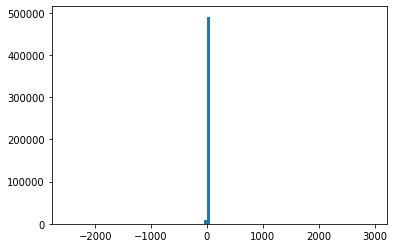

In [42]:
plt.hist(pic_lat, bins = 100);

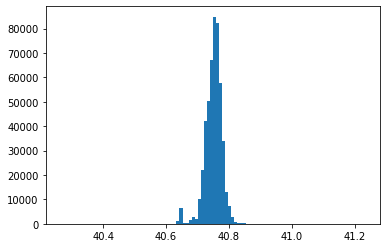

In [43]:
plt.hist(pic_lat[(pic_lat > pic_lat.median() - 0.5) & (pic_lat < pic_lat.median() + 0.5)], bins = 100);

In [44]:
pic_lat_val = (pic_lat > pic_lat.median() - 0.5) & (pic_lat < pic_lat.median() + 0.5)
print(pic_lat_val.value_counts(), '\n', pic_lat_val.value_counts(normalize = True))

True     490176
False      9820
Name: pickup_latitude, dtype: int64 
 True     0.98036
False    0.01964
Name: pickup_latitude, dtype: float64


#### `dropoff_longitude`

In [45]:
dro_lon = train['dropoff_longitude']
dro_lon.describe()

count    499996.000000
mean        -72.469894
std          12.751066
min       -3325.981689
25%         -73.991386
50%         -73.980087
75%         -73.963623
max        2874.608398
Name: dropoff_longitude, dtype: float64

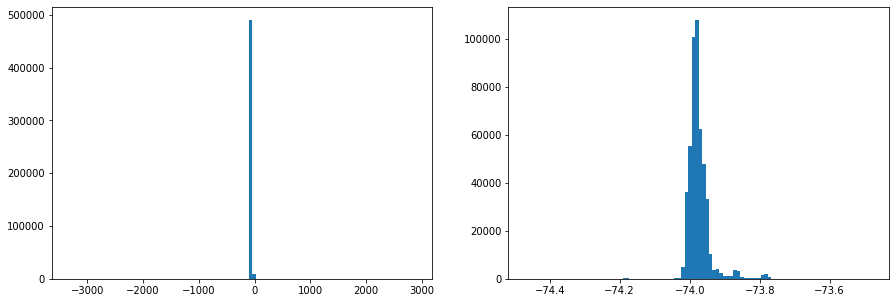

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dro_lon, bins = 100)
ax[1].hist(dro_lon[(dro_lon > dro_lon.median() - 0.5) & (dro_lon < dro_lon.median() + 0.5)], bins = 100);

In [47]:
dro_lon_val = (dro_lon > dro_lon.median() - 0.5) & (dro_lon < dro_lon.median() + 0.5)
print(dro_lon_val.value_counts(), '\n', dro_lon_val.value_counts(normalize = True))

True     490152
False      9844
Name: dropoff_longitude, dtype: int64 
 True     0.980312
False    0.019688
Name: dropoff_longitude, dtype: float64


#### `dropoff_latitude`

In [48]:
dro_lat = train['dropoff_latitude']
dro_lat.describe()

count    499996.000000
mean         39.943764
std          10.363125
min       -2463.254395
25%          40.733952
50%          40.753139
75%          40.768131
max        2924.975830
Name: dropoff_latitude, dtype: float64

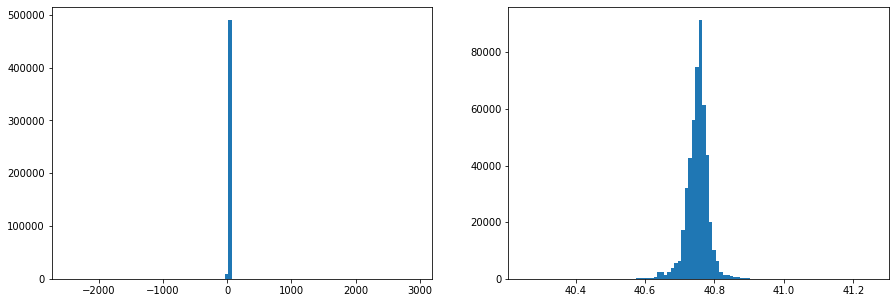

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dro_lat, bins = 100)
ax[1].hist(dro_lat[(dro_lat > dro_lat.median() - 0.5) & (dro_lat < dro_lat.median() + 0.5)], bins = 100);

In [50]:
dro_lat_val = (dro_lat > dro_lat.median() - 0.5) & (dro_lat < dro_lat.median() + 0.5)
print(dro_lat_val.value_counts(), '\n', dro_lat_val.value_counts(normalize = True))

True     490207
False      9789
Name: dropoff_latitude, dtype: int64 
 True     0.980422
False    0.019578
Name: dropoff_latitude, dtype: float64


### Integer

#### `passenger_count`

In [51]:
pass_cnt = train['passenger_count']
pass_cnt.describe()

count    499996.000000
mean          1.684477
std           1.307536
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [52]:
print((pass_cnt == 0).sum(), (pass_cnt == 0).mean())

1754 0.003508028064224514


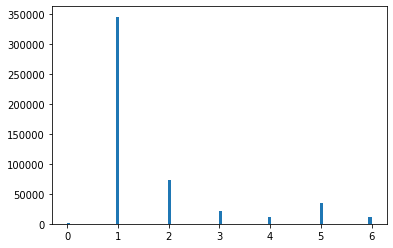

In [53]:
plt.hist(pass_cnt, bins = 100);

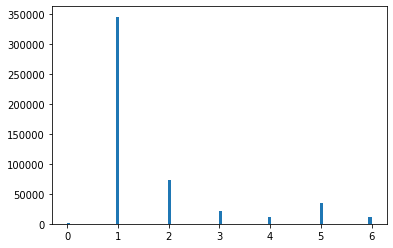

In [54]:
plt.hist(pass_cnt[pass_cnt < 20], bins = 100);

In [55]:
pass_cnt_val = (pass_cnt >= 1) & (pass_cnt <= 6)
print(pass_cnt_val.value_counts(), '\n', pass_cnt_val.value_counts(normalize = True))

True     498242
False      1754
Name: passenger_count, dtype: int64 
 True     0.996492
False    0.003508
Name: passenger_count, dtype: float64


### Floats

#### `fare_amount`

In [56]:
fare = train['fare_amount']
fare.describe()

count    499996.000000
mean         11.330045
std           9.776585
min         -12.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         455.000000
Name: fare_amount, dtype: float64

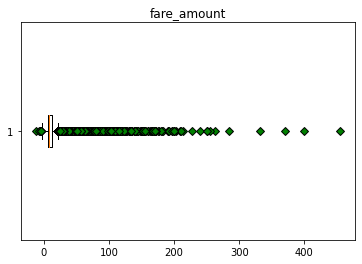

In [57]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('fare_amount')
ax1.boxplot(fare, vert=False, flierprops=green_diamond);

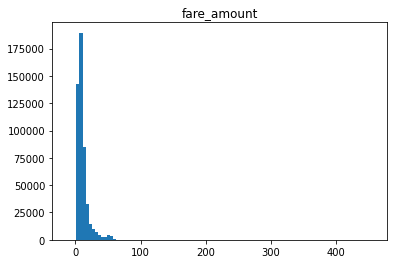

In [58]:
plt.title('fare_amount')
plt.hist(fare, bins = 100);

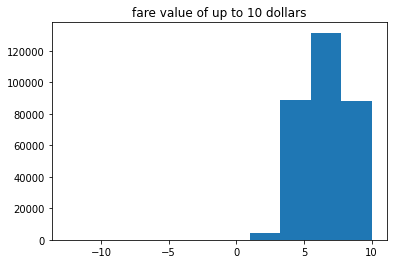

In [59]:
plt.title('fare value of up to 10 dollars')
plt.hist(fare[fare <= 10], bins = 10);

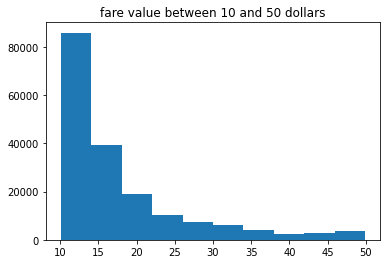

In [60]:
plt.title('fare value between 10 and 50 dollars')
plt.hist(fare[(fare > 10) & (fare < 50)], bins = 10);

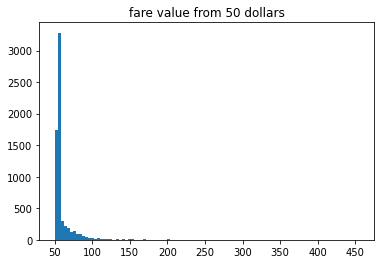

In [61]:
plt.title('fare value from 50 dollars')
plt.hist(fare[fare >= 50], bins = 100);

In [62]:
fare_val = (fare > 2) & (fare < 150)
print(fare_val.value_counts(), '\n', fare_val.value_counts(normalize = True))

True     499906
False        90
Name: fare_amount, dtype: int64 
 True     0.99982
False    0.00018
Name: fare_amount, dtype: float64


### Joining the variables

In [63]:
val_entries = fare_val & pic_lon_val & pic_lat_val & dro_lon_val & dro_lat_val & pass_cnt_val

In [64]:
print(val_entries.value_counts(), '\n', val_entries.value_counts(normalize = True))

True     487712
False     12284
dtype: int64 
 True     0.975432
False    0.024568
dtype: float64


In [65]:
train = train.drop(val_entries[val_entries == False].index)

In [66]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.30,2011-11-07 10:47:40,-74.003922,40.753017,-73.992371,40.735363,1
1,11.50,2012-12-21 06:47:00,-73.947472,40.771229,-73.981834,40.760273,1
2,49.57,2010-05-24 14:24:00,-73.982483,40.756741,-73.789986,40.646912,1
3,22.00,2014-05-01 14:20:00,-74.016846,40.704765,-73.975609,40.748966,1
4,14.10,2011-02-04 18:43:06,-74.003609,40.720436,-73.985764,40.759838,1


In [67]:
train.shape

(487712, 7)

## Engineering features

Considering that the two most important factors in the taxi fare are travel time and distance.

### Travel time

Travel duration is not given and we do not calculate because arrival time is not given.

Something that influences the duration of the trip is the traffic condition. We can deduce using `pickup_datetime`.

* *hour of day*: traffic will be lower at night
* *day of the week*: traffic will be lower on weekends
* *day of the month*: end of the month would have less traffic
* *day of the year*: holidays and vacations, for example
* *year*: may be influenced by changes in transport rules or inflation

In [68]:
train['hour_of_day'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)

In [69]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day
0,7.30,2011-11-07 10:47:40,-74.003922,40.753017,-73.992371,40.735363,1,10
1,11.50,2012-12-21 06:47:00,-73.947472,40.771229,-73.981834,40.760273,1,6
2,49.57,2010-05-24 14:24:00,-73.982483,40.756741,-73.789986,40.646912,1,14
3,22.00,2014-05-01 14:20:00,-74.016846,40.704765,-73.975609,40.748966,1,14
4,14.10,2011-02-04 18:43:06,-74.003609,40.720436,-73.985764,40.759838,1,18


In [70]:
train['day_of_week']  = train['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
train['day_of_year']  = train['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
train['day_of_month'] = train['pickup_datetime'].map(lambda date: date.timetuple().tm_mday)
train['year']         = train['pickup_datetime'].map(lambda date: date.timetuple().tm_year)

In [71]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,day_of_month,year
0,7.30,2011-11-07 10:47:40,-74.003922,40.753017,-73.992371,40.735363,1,10,0,311,7,2011
1,11.50,2012-12-21 06:47:00,-73.947472,40.771229,-73.981834,40.760273,1,6,4,356,21,2012
2,49.57,2010-05-24 14:24:00,-73.982483,40.756741,-73.789986,40.646912,1,14,0,144,24,2010
3,22.00,2014-05-01 14:20:00,-74.016846,40.704765,-73.975609,40.748966,1,14,3,121,1,2014
4,14.10,2011-02-04 18:43:06,-74.003609,40.720436,-73.985764,40.759838,1,18,4,35,4,2011


In [72]:
len(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'])

215

In [73]:
train.drop(train['pickup_datetime'][train['pickup_datetime'].dt.strftime('%m-%d') == '02-29'].index,
           inplace = True)

In [74]:
train.shape

(487497, 12)

In [75]:
condition = (train['year'] == 2012) & (train['day_of_year'] > 59)
train['day_of_year'][condition] = train['day_of_year'] - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


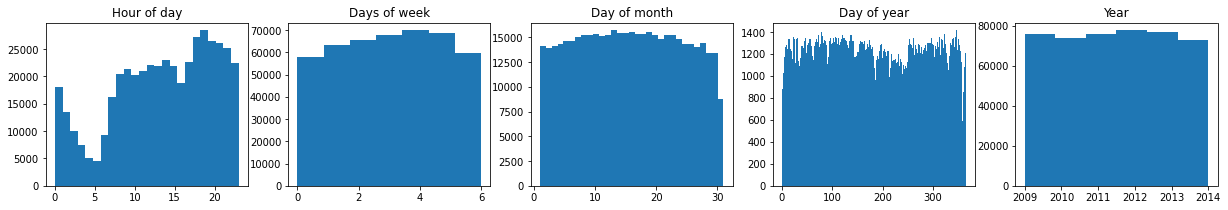

In [76]:
fig, ax = plt.subplots(1, 5, figsize = (21,3))
train_not_2015 = train[train['year'] < 2015]
ax[0].set_title('Hour of day')
ax[0].hist(train_not_2015['hour_of_day'], bins = 24)
ax[1].set_title('Days of week')
ax[1].hist(train_not_2015['day_of_week'], bins = 7)
ax[2].set_title('Day of month')
ax[2].hist(train_not_2015['day_of_month'], bins = 31)
ax[3].set_title('Day of year')
ax[3].hist(train_not_2015['day_of_year'], bins = 365)
ax[4].set_title('Year')
ax[4].hist(train_not_2015['year'], bins = 6);


#### Relations between pickup_datetime and demand

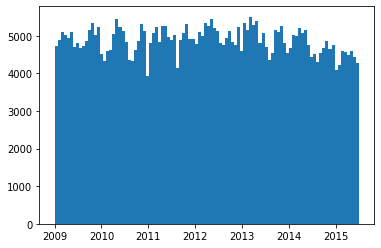

In [77]:
plt.hist(train['pickup_datetime'], bins = 100);

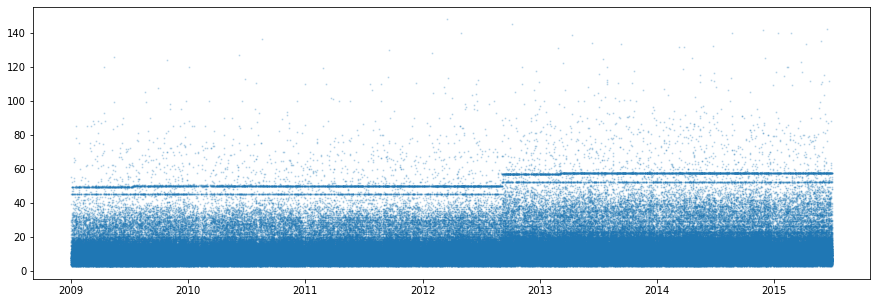

In [78]:
plt.figure(figsize = (15, 5))
plt.scatter(train['pickup_datetime'], train['fare_amount'], s = 1, alpha = 0.2);

##### Note that at the end of 2012 there was a price correction.

In [79]:
train['fare_amount'].describe()

count    487497.000000
mean         11.301461
std           9.487255
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         147.800003
Name: fare_amount, dtype: float64

In [80]:
from collections import Counter
fare_zoom = train['fare_amount'][(train['fare_amount'] > 40) & (train['fare_amount'] < 60)]

In [81]:
fare_zoom.shape

(12119,)

In [82]:
common_fares_zoom = Counter(fare_zoom)

In [83]:
common_fares_zoom

Counter({40.040000915527344: 18,
         40.04999923706055: 1,
         40.099998474121094: 36,
         40.15999984741211: 1,
         40.189998626708984: 2,
         40.20000076293945: 1,
         40.25: 4,
         40.27000045776367: 11,
         40.29999923706055: 27,
         40.33000183105469: 113,
         40.349998474121094: 1,
         40.400001525878906: 3,
         40.439998626708984: 1,
         40.5: 131,
         40.540000915527344: 17,
         40.650001525878906: 2,
         40.65999984741211: 1,
         40.66999816894531: 7,
         40.70000076293945: 1,
         40.79999923706055: 17,
         40.83000183105469: 107,
         40.900001525878906: 40,
         40.939998626708984: 1,
         41.0: 78,
         41.040000915527344: 16,
         41.04999923706055: 2,
         41.06999969482422: 3,
         41.099998474121094: 1,
         41.150001525878906: 1,
         41.15999984741211: 1,
         41.20000076293945: 1,
         41.29999923706055: 54,
         41.33000

In [84]:
most_common_fares_zoom = common_fares_zoom.most_common(40)

In [85]:
most_common_fares_zoom

[(57.33000183105469, 2086),
 (49.79999923706055, 1476),
 (45.0, 1311),
 (52.0, 939),
 (49.56999969482422, 893),
 (56.79999923706055, 453),
 (57.540000915527344, 298),
 (49.150001525878906, 295),
 (40.5, 131),
 (50.0, 131),
 (50.5, 131),
 (40.33000183105469, 113),
 (40.83000183105469, 107),
 (41.33000183105469, 104),
 (42.5, 97),
 (41.83000183105469, 80),
 (41.0, 78),
 (43.5, 71),
 (42.33000183105469, 67),
 (43.83000183105469, 66),
 (43.33000183105469, 62),
 (43.0, 61),
 (42.83000183105469, 60),
 (44.5, 60),
 (42.0, 59),
 (41.5, 57),
 (44.33000183105469, 56),
 (46.5, 55),
 (44.0, 54),
 (41.29999923706055, 54),
 (46.0, 51),
 (43.29999923706055, 50),
 (44.83000183105469, 49),
 (53.0, 46),
 (48.0, 45),
 (45.83000183105469, 43),
 (45.5, 42),
 (47.5, 41),
 (51.0, 41),
 (42.099998474121094, 41)]

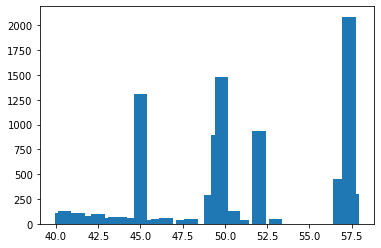

In [86]:
plt.bar([x[0] for x in most_common_fares_zoom], [x[1] for x in most_common_fares_zoom]);

### NYC latitude and longitude

In [87]:
from mpl_toolkits.basemap import Basemap

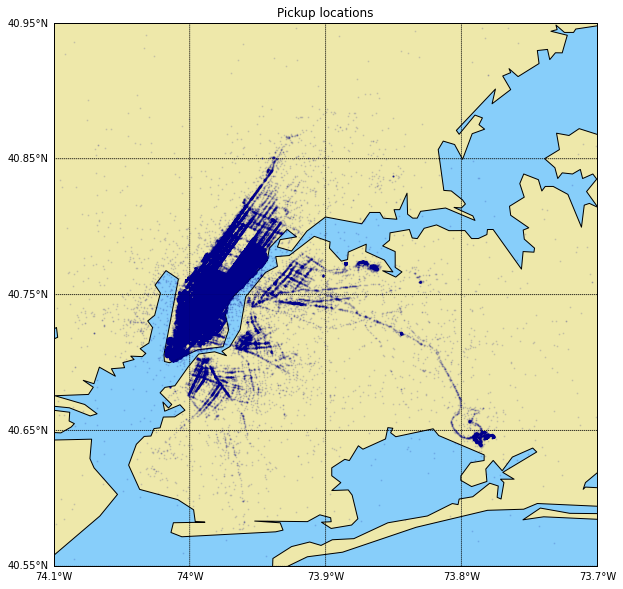

In [88]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize = (10, 10))
plt.title('Pickup locations')
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), labels = [0, 0, 0, 1])
# Pickup locations 
m.scatter(train['pickup_longitude'], train['pickup_latitude'], s = 1, c = 'darkblue',
          alpha = 0.1, zorder = 5);


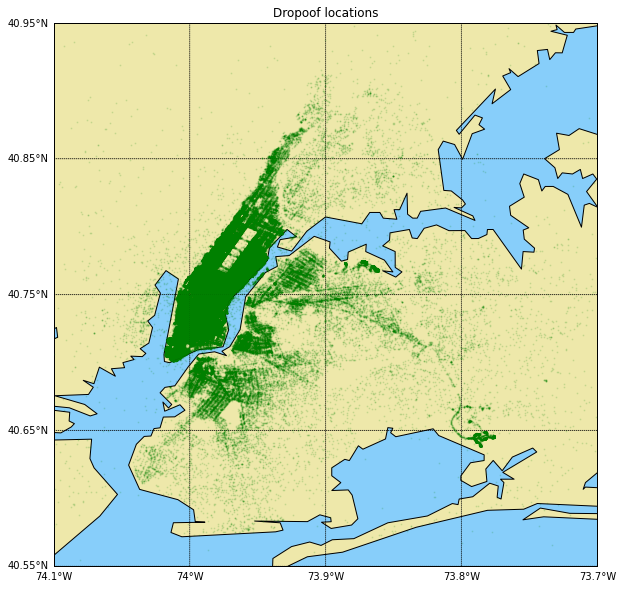

In [89]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize = (10, 10))
plt.title('Dropoof locations')
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), labels = [0, 0, 0, 1])

# Dropoof locations 
m.scatter(train['dropoff_longitude'], train['dropoff_latitude'], s = 1, c='green',
         alpha = 0.1, zorder = 5);

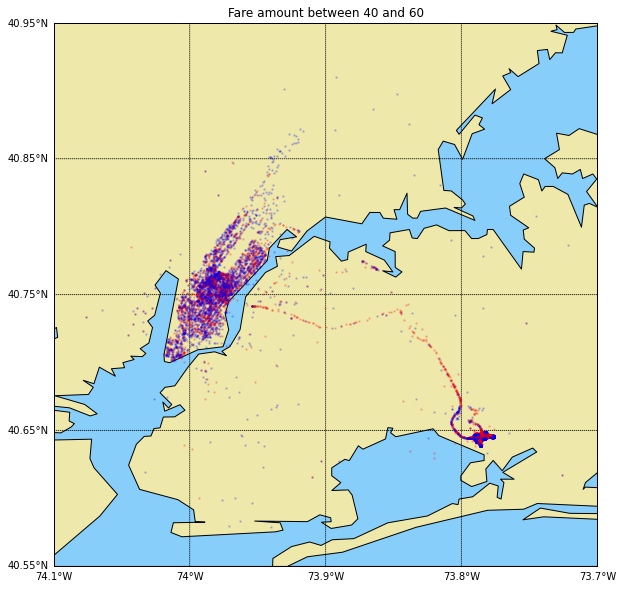

In [90]:
lat1, lat2 = 40.55, 40.95
lon1, lon2 = -74.10, -73.70

plt.figure(figsize = (10, 10))
plt.title('Fare amount between 40 and 60')
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.drawparallels(np.arange(lat1, lat2 + 0.05, 0.1), labels = [1, 0, 0, 0])
m.drawmeridians(np.arange(lon1, lon2 + 0.05, 0.1), labels = [0, 0, 0, 1])

for i in [0, 1, 2, 4]:
  this_fare = most_common_fares_zoom[i][0]
  this_df = train[train['fare_amount'] == this_fare]
  # pickup location 
  m.scatter(this_df['pickup_longitude'], this_df['pickup_latitude'], s = 2, c = 'red',
           alpha = 0.2, zorder = 5)
  # dropoff location
  m.scatter(this_df['dropoff_longitude'], this_df['dropoff_latitude'], s = 2, c = 'blue',
           alpha = 0.2, zorder = 5)
  

In [91]:
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) &
                                       (train['dropoff_latitude'] > 40.6) &
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [92]:
coords.shape

(3332, 2)

In [93]:
coords.head()

,dropoff_latitude,dropoff_longitude
2,40.646912,-73.789986
42,40.648788,-73.782310
190,40.643539,-73.790154
362,40.644775,-73.776711
468,40.646782,-73.790070


In [94]:
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.64516067504883 -73.7861557006836


In [95]:
coords = train[['dropoff_latitude',
                'dropoff_longitude']][(train['fare_amount'] > 40) &
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.85) &
                                       (train['dropoff_latitude'] > 40.7) &
                                       (train['dropoff_longitude'] < -73.9) &
                                       (train['dropoff_longitude'] > -74.1)]

In [96]:
print(coords['dropoff_latitude'].median(), coords['dropoff_longitude'].median())

40.755218505859375 -73.98291778564453


In [97]:
filtered = train[['fare_amount', 
                  'passenger_count']][((train['fare_amount'] == most_common_fares_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [98]:
filtered.shape

(2229, 2)

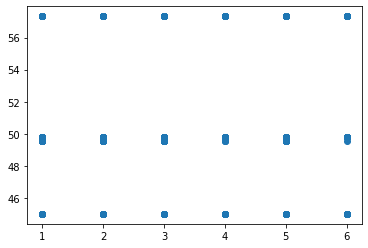

In [99]:
plt.scatter(filtered['passenger_count'], filtered['fare_amount']);

In [100]:
filtered = train[['fare_amount', 
                  'hour_of_day',
                  'day_of_week',
                  'day_of_month',
                  'day_of_year']][((train['fare_amount'] == most_common_fares_zoom[0][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[1][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[2][0]) |
                                       (train['fare_amount'] == most_common_fares_zoom[4][0]))&
                                       (train['fare_amount'] < 60) &
                                       (train['dropoff_latitude'] < 40.7) & 
                                       (train['dropoff_latitude'] > 40.6) & 
                                       (train['dropoff_longitude'] < -73.7) &
                                       (train['dropoff_longitude'] > -73.9)]

In [101]:
filtered.shape

(2229, 5)

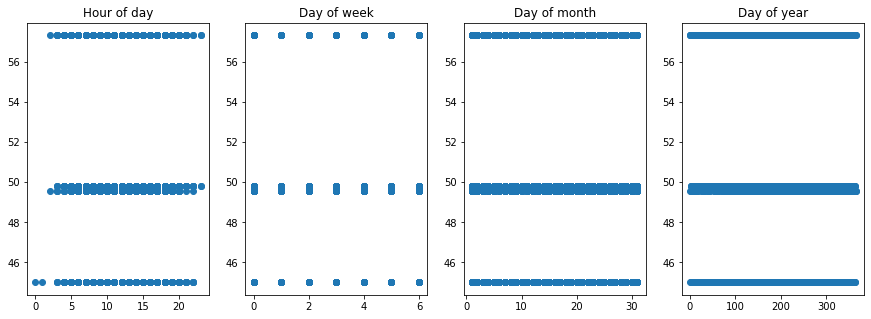

In [102]:
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
ax[0].scatter(filtered['hour_of_day'], filtered['fare_amount'])
ax[0].set_title('Hour of day')
ax[1].scatter(filtered['day_of_week'], filtered['fare_amount'])
ax[1].set_title('Day of week')
ax[2].scatter(filtered['day_of_month'], filtered['fare_amount'])
ax[2].set_title('Day of month')
ax[3].scatter(filtered['day_of_year'], filtered['fare_amount'])
ax[3].set_title('Day of year');

In [103]:
train.drop('pickup_datetime', axis = 1, inplace = True)

In [104]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,day_of_month,year
0,7.30,-74.003922,40.753017,-73.992371,40.735363,1,10,0,311,7,2011
1,11.50,-73.947472,40.771229,-73.981834,40.760273,1,6,4,355,21,2012
2,49.57,-73.982483,40.756741,-73.789986,40.646912,1,14,0,144,24,2010
3,22.00,-74.016846,40.704765,-73.975609,40.748966,1,14,3,121,1,2014
4,14.10,-74.003609,40.720436,-73.985764,40.759838,1,18,4,35,4,2011


### Distance

In [105]:
lon1, lon2 = np.radians(train['pickup_longitude']), np.radians(train['dropoff_longitude'])

In [106]:
lon1

0        -1.291612
1        -1.290627
2        -1.291238
3        -1.291838
4        -1.291607
            ...   
499995   -1.290964
499996   -1.291318
499997   -1.291363
499998   -1.291298
499999   -1.291442
Name: pickup_longitude, Length: 487497, dtype: float32

In [107]:
lat1, lat2 = np.radians(train['pickup_latitude']), np.radians(train['dropoff_latitude'])

In [108]:
dlon = lon2 - lon1
dlat = lat2 - lat1

### Euclidean Distance (Km)

In [109]:
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
train['eucl_distance'] = 6373 * c

In [110]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,day_of_month,year,eucl_distance
0,7.30,-74.003922,40.753017,-73.992371,40.735363,1,10,0,311,7,2011,2.191501
1,11.50,-73.947472,40.771229,-73.981834,40.760273,1,6,4,355,21,2012,3.140875
2,49.57,-73.982483,40.756741,-73.789986,40.646912,1,14,0,144,24,2010,20.315968
3,22.00,-74.016846,40.704765,-73.975609,40.748966,1,14,3,121,1,2014,6.021379
4,14.10,-74.003609,40.720436,-73.985764,40.759838,1,18,4,35,4,2011,4.633378


### Manhattan Distance (Km)

In [111]:
a1 = np.sin(dlon / 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
a2 = np.sin(dlat / 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
train['manh_distance'] = 6373 * (c1 + c2)

In [112]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,day_of_month,year,eucl_distance,manh_distance
0,7.30,-74.003922,40.753017,-73.992371,40.735363,1,10,0,311,7,2011,2.191501,3.248186
1,11.50,-73.947472,40.771229,-73.981834,40.760273,1,6,4,355,21,2012,3.140875,5.040748
2,49.57,-73.982483,40.756741,-73.789986,40.646912,1,14,0,144,24,2010,20.315968,33.628281
3,22.00,-74.016846,40.704765,-73.975609,40.748966,1,14,3,121,1,2014,6.021379,9.503727
4,14.10,-74.003609,40.720436,-73.985764,40.759838,1,18,4,35,4,2011,4.633378,6.367600


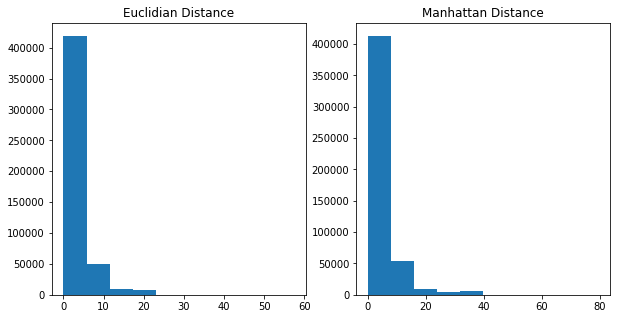

In [113]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].set_title('Euclidian Distance')
ax[0].hist(train['eucl_distance']);

ax[1].set_title('Manhattan Distance')
ax[1].hist(train['manh_distance']);


## Pre-processing

In [114]:
X_train = train.drop('fare_amount', axis = 1)

In [115]:
y_train = train['fare_amount']

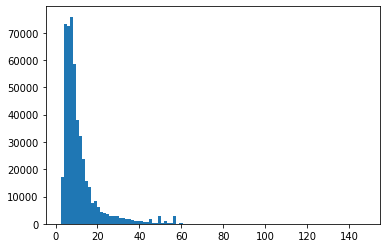

In [116]:
plt.hist(y_train, bins = 100);

In [117]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,day_of_week,day_of_year,day_of_month,year,eucl_distance,manh_distance
0,-74.003922,40.753017,-73.992371,40.735363,1,10,0,311,7,2011,2.191501,3.248186
1,-73.947472,40.771229,-73.981834,40.760273,1,6,4,355,21,2012,3.140875,5.040748
2,-73.982483,40.756741,-73.789986,40.646912,1,14,0,144,24,2010,20.315968,33.628281
3,-74.016846,40.704765,-73.975609,40.748966,1,14,3,121,1,2014,6.021379,9.503727
4,-74.003609,40.720436,-73.985764,40.759838,1,18,4,35,4,2011,4.633378,6.367600


In [118]:
X_train['hour_of_day_sin'] = X_train['hour_of_day'].apply( lambda x: np.sin( x * (2. * np.pi/24 ) ) )
X_train['hour_of_day_cos'] = X_train['hour_of_day'].apply( lambda x: np.cos( x * (2. * np.pi/24) ) )

X_train['day_of_week_sin'] = X_train['day_of_week'].apply( lambda x: np.sin( x * (2. * np.pi/7 ) ) )
X_train['day_of_week_cos'] = X_train['day_of_week'].apply( lambda x: np.cos( x * (2. * np.pi/7) ) )

X_train['day_of_month_sin'] = X_train['day_of_month'].apply( lambda x: np.sin( x * (2. * np.pi/30 ) ) )
X_train['day_of_month_cos'] = X_train['day_of_month'].apply( lambda x: np.cos( x * (2. * np.pi/30 ) ) )

X_train['day_of_year_sin'] = X_train['day_of_year'].apply( lambda x: np.sin( x * (2. * np.pi/12 ) ) )
X_train['day_of_year_cos'] = X_train['day_of_year'].apply( lambda x: np.cos( x * (2. * np.pi/12 ) ) )

### Remove columns that derived new features

In [119]:
cols_drop = ['hour_of_day','day_of_week', 'day_of_month', 'day_of_year']
X_train = X_train.drop( cols_drop, axis=1 )

In [120]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,eucl_distance,manh_distance,hour_of_day_sin,hour_of_day_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos
0,-74.003922,40.753017,-73.992371,40.735363,1,2011,2.191501,3.248186,5.000000e-01,-8.660254e-01,0.000000,1.000000,0.994522,0.104528,-5.000000e-01,8.660254e-01
1,-73.947472,40.771229,-73.981834,40.760273,1,2012,3.140875,5.040748,1.000000e+00,6.123234e-17,-0.433884,-0.900969,-0.951057,-0.309017,-5.000000e-01,-8.660254e-01
2,-73.982483,40.756741,-73.789986,40.646912,1,2010,20.315968,33.628281,-5.000000e-01,-8.660254e-01,0.000000,1.000000,-0.951057,0.309017,-2.939152e-15,1.000000e+00
3,-74.016846,40.704765,-73.975609,40.748966,1,2014,6.021379,9.503727,-5.000000e-01,-8.660254e-01,0.433884,-0.900969,0.207912,0.978148,5.000000e-01,8.660254e-01
4,-74.003609,40.720436,-73.985764,40.759838,1,2011,4.633378,6.367600,-1.000000e+00,-1.836970e-16,-0.433884,-0.900969,0.743145,0.669131,-5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,-73.966774,40.788921,-73.988045,40.768867,1,2009,2.860872,4.596311,-7.071068e-01,-7.071068e-01,0.781831,0.623490,-0.406737,-0.913545,-9.797174e-16,1.000000e+00
499996,-73.987076,40.771271,-74.000374,40.723824,1,2014,5.395066,6.756577,-2.588190e-01,-9.659258e-01,0.974928,-0.222521,0.866025,0.500000,8.660254e-01,-5.000000e-01
499997,-73.989639,40.747295,-73.980560,40.760815,2,2010,1.686849,2.513156,1.224647e-16,-1.000000e+00,0.974928,-0.222521,-0.587785,0.809017,1.000000e+00,2.327448e-15
499998,-73.985924,40.735279,-73.995834,40.769398,2,2010,3.885602,4.897161,-7.071068e-01,7.071068e-01,-0.974928,-0.222521,-0.587785,-0.809017,-1.000000e+00,-1.420900e-14


In [121]:
X_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,eucl_distance,manh_distance,hour_of_day_sin,hour_of_day_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos
count,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,487497.000000,4.874970e+05,487497.000000,4.874970e+05,4.874970e+05
mean,-73.897003,40.742859,-73.896439,40.743591,1.690706,2011.739340,3.310055,4.876764,-0.197137,-0.067212,-0.003482,-0.041750,4.317283e-03,-0.007982,7.665762e-03,-1.631105e-03
std,0.085868,0.028354,0.085402,0.032005,1.305904,1.865727,3.572572,5.545937,0.667878,0.714535,0.710665,0.702284,7.035738e-01,0.710566,7.079991e-01,7.061713e-01
min,-74.463562,40.265160,-74.468704,40.256218,1.000000,2009.000000,0.000000,0.000000,-1.000000,-1.000000,-0.974928,-0.900969,-9.945219e-01,-1.000000,-1.000000e+00,-1.000000e+00
25%,-73.992271,40.736477,-73.991570,40.735443,1.000000,2010.000000,1.253517,1.819911,-0.866025,-0.707107,-0.781831,-0.900969,-7.431448e-01,-0.669131,-5.000000e-01,-8.660254e-01
50%,-73.982101,40.753334,-73.980537,40.753819,1.000000,2012.000000,2.151899,3.125112,-0.258819,-0.258819,0.000000,-0.222521,1.224647e-16,-0.104528,8.572528e-16,-1.836970e-16
75%,-73.968277,40.767502,-73.965294,40.768391,2.000000,2013.000000,3.905864,5.643966,0.500000,0.707107,0.781831,0.623490,7.431448e-01,0.669131,8.660254e-01,5.000000e-01
max,-73.483070,41.233044,-73.480423,41.186993,6.000000,2015.000000,57.406616,79.483513,1.000000,1.000000,0.974928,1.000000,9.945219e-01,1.000000,1.000000e+00,1.000000e+00


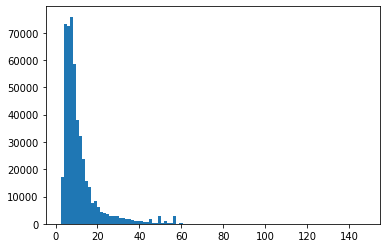

In [122]:
plt.hist(y_train, bins = 100);

In [123]:
y_train

0          7.30
1         11.50
2         49.57
3         22.00
4         14.10
          ...  
499995     7.70
499996    21.00
499997     4.90
499998    10.50
499999     7.30
Name: fare_amount, Length: 487497, dtype: float32

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [125]:
X_train_scaled[0]

array([0.46878574, 0.50404572, 0.48198184, 0.51478092, 0.        ,
       0.33333333, 0.03817506, 0.04086616, 0.75      , 0.0669873 ,
       0.5       , 1.        , 1.        , 0.55226423, 0.25      ,
       0.9330127 ])

## Training

In [126]:
from sklearn.model_selection import cross_val_score, cross_validate
cv = 3
scoring = 'neg_mean_squared_error'
import multiprocessing
n_jobs = multiprocessing.cpu_count() - 1

In [127]:
n_jobs

1

### Linear Regression

In [128]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Ridge Regression

In [129]:
#from sklearn.linear_model import Ridge
#model = Ridge()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Lasso Regression

In [130]:
#from sklearn.linear_model import Lasso
#model = Lasso()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Nearest Neighbors

In [131]:
#from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Decision Tree

In [132]:
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Random Forest

In [133]:
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### Gradient Boosting

In [134]:
#from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

### XGBoost

In [135]:
import xgboost as xgb
model = xgb.XGBRegressor()
scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
                         scoring = scoring, n_jobs = n_jobs)
np.sqrt(-scores.mean())

[20:00:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.8082330307943995

### Deep Learning 

In [136]:
#from sklearn.neural_network import MLPRegressor
#model = MLPRegressor()
#scores = cross_val_score(model, X_train_scaled, y_train, cv = cv,
#                         scoring = scoring, n_jobs = n_jobs)
#np.sqrt(-scores.mean())

## Finding out the best model

### Splitting the database

In [137]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X_train_scaled, y_train,
                                                      test_size = 0.2, random_state = 4)

In [138]:
X_train1.shape

(389997, 16)

In [139]:
X_test.shape

(97500, 16)

### Training the model

In [140]:
model = xgb.XGBRegressor()
model.fit(X_train1, y_train1)

[20:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Inspecting the model

In [141]:
features_importances = model.feature_importances_

In [142]:
features_importances

array([2.8557822e-02, 6.5305019e-03, 3.9342426e-02, 1.1358368e-02,
       2.3548005e-03, 4.5237925e-02, 6.9599253e-01, 1.3315421e-01,
       5.3752488e-03, 1.3658694e-02, 8.2199257e-03, 2.7272110e-03,
       5.0785556e-04, 2.0046667e-03, 4.5341626e-03, 4.4363571e-04],
      dtype=float32)

In [143]:
argsort = np.argsort(features_importances)

In [144]:
argsort

array([15, 12, 13,  4, 11, 14,  8,  1, 10,  3,  9,  0,  2,  5,  7,  6])

In [145]:
features_importances_sorted = features_importances[argsort]

In [146]:
features_importances_sorted

array([4.4363571e-04, 5.0785556e-04, 2.0046667e-03, 2.3548005e-03,
       2.7272110e-03, 4.5341626e-03, 5.3752488e-03, 6.5305019e-03,
       8.2199257e-03, 1.1358368e-02, 1.3658694e-02, 2.8557822e-02,
       3.9342426e-02, 4.5237925e-02, 1.3315421e-01, 6.9599253e-01],
      dtype=float32)

In [147]:
feature_names = X_train.columns

In [148]:
feature_names

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'eucl_distance',
       'manh_distance', 'hour_of_day_sin', 'hour_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_year_sin', 'day_of_year_cos'],
      dtype='object')

In [149]:
features_sorted = feature_names[argsort]

In [150]:
features_sorted

Index(['day_of_year_cos', 'day_of_month_sin', 'day_of_month_cos',
       'passenger_count', 'day_of_week_cos', 'day_of_year_sin',
       'hour_of_day_sin', 'pickup_latitude', 'day_of_week_sin',
       'dropoff_latitude', 'hour_of_day_cos', 'pickup_longitude',
       'dropoff_longitude', 'year', 'manh_distance', 'eucl_distance'],
      dtype='object')

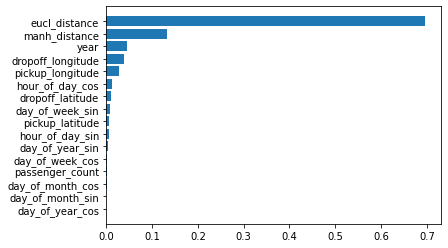

In [151]:
plt.barh(features_sorted, features_importances_sorted);

## Predictions in test database

In [152]:
y_pred = model.predict(X_test)

In [153]:
y_pred

array([18.691023 ,  7.17126  , 13.508915 , ..., 29.826502 ,  5.653697 ,
        7.5628233], dtype=float32)

In [154]:
y_test

111457    16.00
6955      20.00
83461     15.70
16085     15.50
336419    12.10
          ...  
165793     5.00
379665     4.50
424702    28.65
468810     5.00
72356     11.70
Name: fare_amount, Length: 97500, dtype: float32

In [155]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

3.7723472

### Comparing predictions with real answers

In [156]:
print_every = int(sample_500 / 1000)
print_every

500

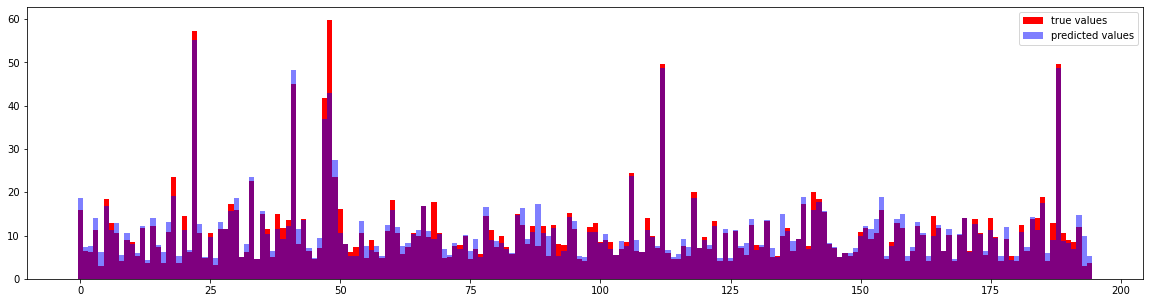

In [157]:
fig = plt.figure(figsize=(20,5));
plt.bar(list(range(len(y_test[::print_every]))), y_test.values[::print_every],
        alpha = 1, color = 'red', width = 1, label = 'true values');
plt.bar(list(range(len(y_pred[::print_every]))), y_pred[::print_every],
        alpha = 0.5, color = 'blue', width = 1, label = 'predicted values');
plt.legend();

## Answering the challenge

Instructions

> **Submission File** <br>
> For each `key` in the test set, you must predict a value for the `fare_amount` variable. The file should contain a header and have the following format:
> 
> ```
> key,fare_amount
> 2015-01-27 13:08:24.0000002,11.00 ```



In [158]:
test = pd.read_csv('test.csv',
                    parse_dates = ['pickup_datetime'],
                    dtype = {'fare_amount': np.float32,
                             'pickup_latitude': np.float32,
                             'pickup_longitude': np.float32,
                             'dropoff_latitude': np.float32,
                             'dropoff_longitude': np.float32,
                             'passenger_count': np.int32,
                             'key': str             
                    })

In [159]:
test.shape

(9914, 7)

In [160]:
key = test['key']

### Data

In [161]:
pdt = test['pickup_datetime']
pdt = pdt.map(lambda date: date.tz_localize(None))
test.drop(['key'], axis = 1, inplace=True)
test['pickup_datetime'] = pdt

### New attributes

In [162]:
test['hour_of_day']  = test['pickup_datetime'].map(lambda date: date.timetuple().tm_hour)
test['day_of_week']  = test['pickup_datetime'].map(lambda date: date.timetuple().tm_wday)
test['day_of_year']  = test['pickup_datetime'].map(lambda date: date.timetuple().tm_yday)
test['day_of_month'] = test['pickup_datetime'].map(lambda date: date.timetuple().tm_mday)
test['year']         = test['pickup_datetime'].map(lambda date: date.timetuple().tm_year)

test.drop('pickup_datetime', axis = 1, inplace = True)

### Distance

In [163]:
lon1, lon2 = np.radians(test['pickup_longitude']), np.radians(test['dropoff_longitude'])
lat1, lat2 = np.radians(test['pickup_latitude']), np.radians(test['dropoff_latitude'])
dlon = lon2 - lon1
dlat = lat2 - lat1

#### Euclidian distance

In [164]:
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
test['eucl_distance'] = 6373 * c


#### Manhattan distance

In [165]:
a1 = np.sin(dlon/2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1-a1))
a2 = np.sin(dlat/2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1-a2))
test['manh_distance'] = 6373 * (c1+c2)

In [166]:
test['hour_of_day_sin'] = test['hour_of_day'].apply( lambda x: np.sin( x * (2. * np.pi/24 ) ) )
test['hour_of_day_cos'] = test['hour_of_day'].apply( lambda x: np.cos( x * (2. * np.pi/7) ) )

test['day_of_week_sin'] = test['day_of_week'].apply( lambda x: np.sin( x * (2. * np.pi/7 ) ) )
test['day_of_week_cos'] = test['day_of_week'].apply( lambda x: np.cos( x * (2. * np.pi/7) ) )

test['day_of_month_sin'] = test['day_of_month'].apply( lambda x: np.sin( x * (2. * np.pi/30 ) ) )
test['day_of_month_cos'] = test['day_of_month'].apply( lambda x: np.cos( x * (2. * np.pi/30 ) ) )

test['day_of_year_sin'] = test['day_of_year'].apply( lambda x: np.sin( x * (2. * np.pi/12 ) ) )
test['day_of_year_cos'] = test['day_of_year'].apply( lambda x: np.cos( x * (2. * np.pi/12 ) ) )

In [167]:
cols_drop = ['hour_of_day','day_of_week', 'day_of_month', 'day_of_year']
test = test.drop( cols_drop, axis=1 )

In [168]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,eucl_distance,manh_distance,hour_of_day_sin,hour_of_day_cos,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,day_of_year_sin,day_of_year_cos
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,2.324087,3.123212,-0.258819,0.623490,0.781831,0.623490,-0.587785,0.809017,1.000000e+00,2.327448e-15
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,2.426061,3.541439,-0.258819,0.623490,0.781831,0.623490,-0.587785,0.809017,1.000000e+00,2.327448e-15
2,-73.982521,40.751259,-73.979652,40.746140,1,2011,0.618597,0.888493,0.258819,-0.900969,-0.974928,-0.222521,0.994522,-0.104528,5.000000e-01,-8.660254e-01
3,-73.981163,40.767807,-73.990448,40.751637,1,2012,1.961528,2.831859,-0.707107,1.000000,-0.974928,-0.222521,0.207912,0.978148,-6.858022e-15,1.000000e+00
4,-73.966049,40.789776,-73.988564,40.744427,1,2012,5.388903,7.548207,-0.707107,1.000000,-0.974928,-0.222521,0.207912,0.978148,-6.858022e-15,1.000000e+00


In [169]:
X_test = test
X_test_scaled = scaler.transform(X_test)

In [170]:
y_pred = model.predict(X_test_scaled)

In [171]:
y_pred

array([ 9.283066,  9.609864,  4.852498, ..., 52.25337 , 21.24414 ,
        6.50683 ], dtype=float32)

In [172]:
submission = pd.DataFrame({'key': key, 'fare_amount': y_pred})

In [173]:
submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.283066
1,2015-01-27 13:08:24.0000003,9.609864
2,2011-10-08 11:53:44.0000002,4.852498
3,2012-12-01 21:12:12.0000002,7.609772
4,2012-12-01 21:12:12.0000003,14.322631


In [174]:
submission.to_csv('submission.csv', index = False)